<a href="https://colab.research.google.com/github/0xemrekara/brent-cpi-analysis/blob/main/BRENT_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           Date  BRENT PRICE (USD)    TUFE  USDTRY
0  Jan 01, 2005              45.92  114.49   13355
1  Feb 01, 2005              50.06  114.51   12830
2  Mar 01, 2005              54.29  114.81   13525
3  Apr 01, 2005              51.09  115.63   13915
4  May 01, 2005              50.73  116.69   13645
Index(['Date', 'BRENT PRICE (USD)', 'TUFE', 'USDTRY'], dtype='object')
BRENT PRICE (USD)    0
TUFE                 0
USDTRY               0
dtype: int64
            BRENT PRICE (USD)    TUFE  USDTRY
Date                                         
2005-01-01              45.92  114.49   13355
2005-02-01              50.06  114.51   12830
2005-03-01              54.29  114.81   13525
2005-04-01              51.09  115.63   13915
2005-05-01              50.73  116.69   13645
Correlation between Brent Price (USD) and TUFE: 0.04296763917477026
ADF Test for Brent Price (USD)
ADF Statistic: -3.039113924864005
p-value: 0.03139961206797505
Critical Values: {'1%': -3.4582467982399105, '5%': -2.873

<ipython-input-1-37676466231e>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TUFE_diff2'] = data['TUFE'].diff().diff()



parameter F test:         F=1.2862  , p=0.2783  , df_denom=229, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9979  , p=0.3946  , df_denom=226, df_num=3
ssr based chi2 test:   chi2=3.0865  , p=0.3785  , df=3
likelihood ratio test: chi2=3.0662  , p=0.3815  , df=3
parameter F test:         F=0.9979  , p=0.3946  , df_denom=226, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8854  , p=0.4734  , df_denom=223, df_num=4
ssr based chi2 test:   chi2=3.6846  , p=0.4504  , df=4
likelihood ratio test: chi2=3.6556  , p=0.4546  , df=4
parameter F test:         F=0.8854  , p=0.4734  , df_denom=223, df_num=4


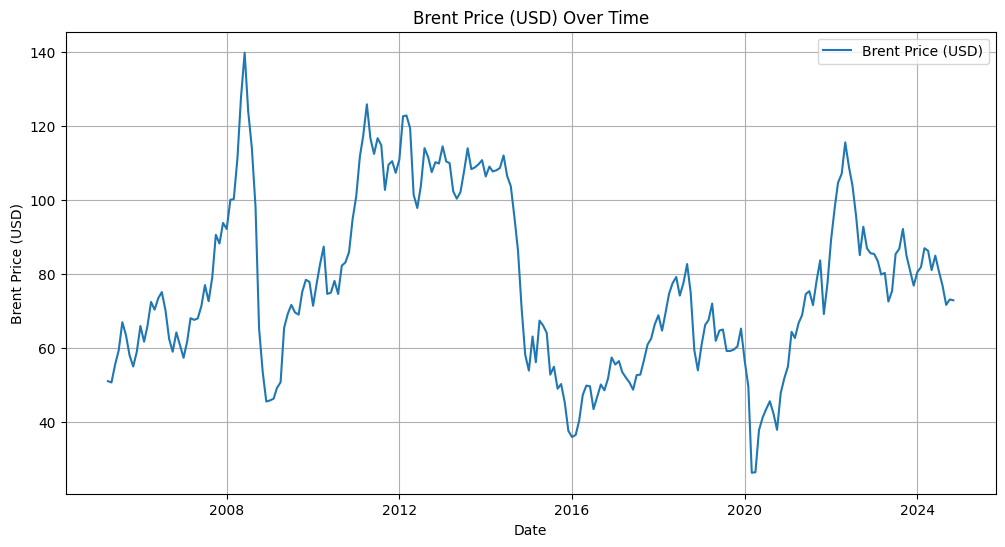

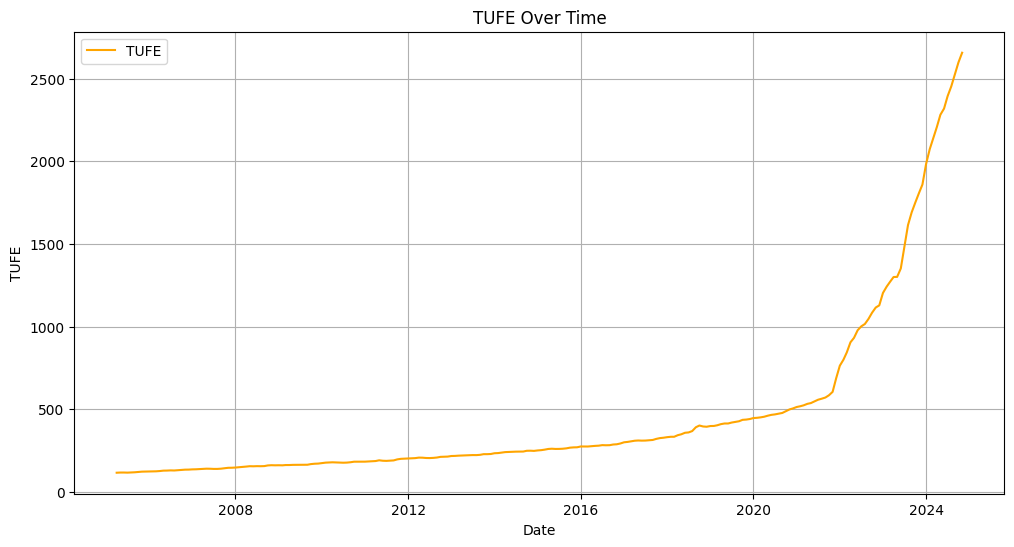

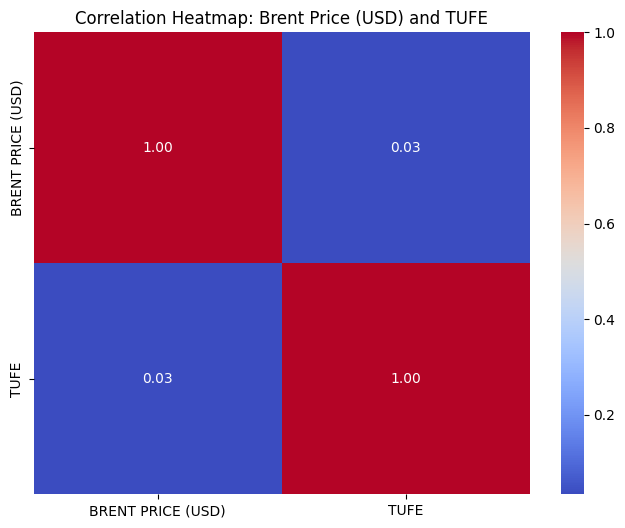

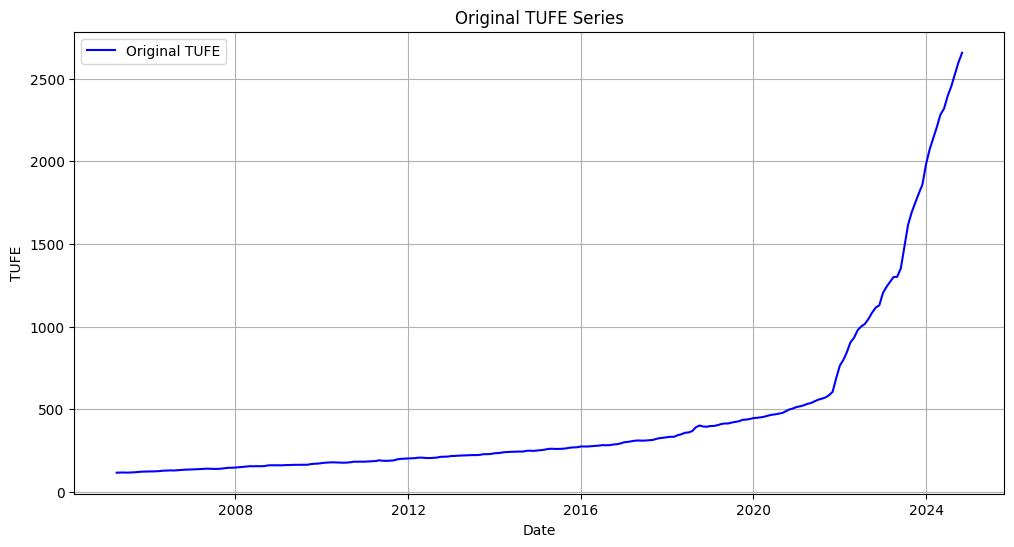

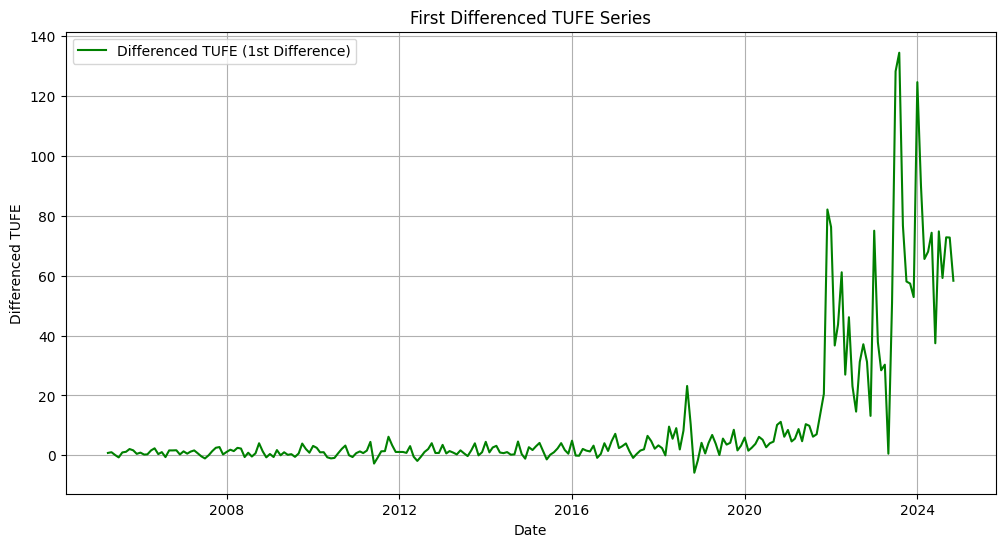

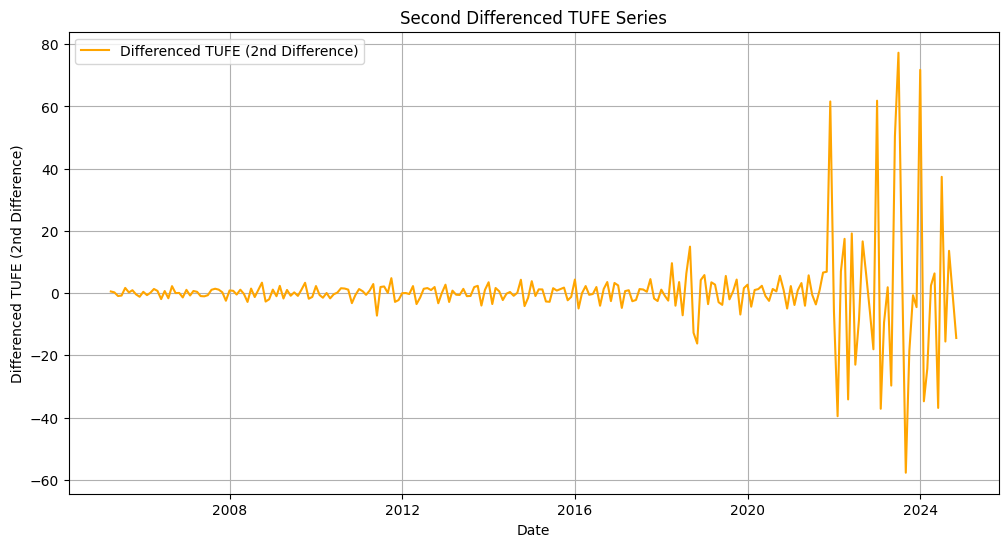

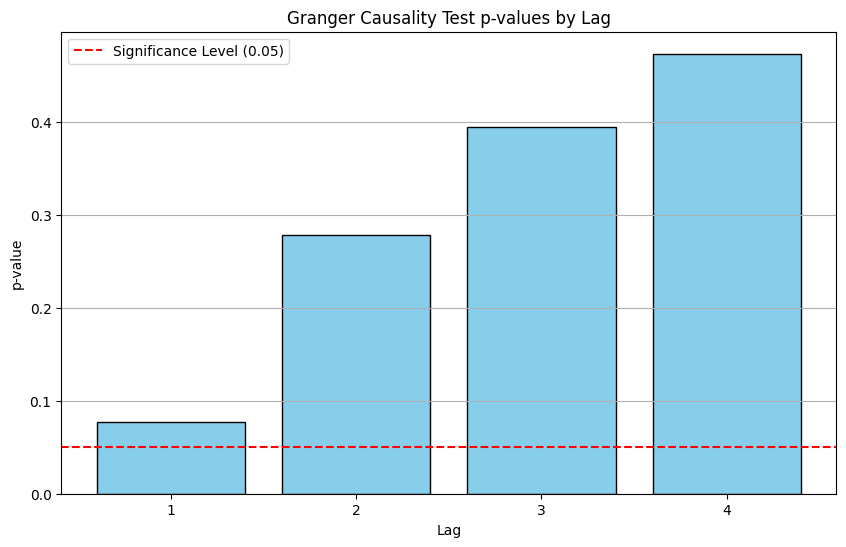

In [1]:
# @title USD BASED CALCULATIONS


# 1.Data Loading and Initial Inspection | Based on USD

# Import necessary library
import pandas as pd

# Load the Excel file into a Pandas DataFrame
data = pd.read_excel("BRENT_TUFE_DATA.xlsx")

# Display the first few rows of the dataset to verify the structure
print(data.head())

# Display the column names to ensure correctness
print(data.columns)

# 2.Data Preparation | Based on USD

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check for missing values in the dataset
print(data.isnull().sum())

# Display the first few rows again to confirm changes
print(data.head())

# 3.Correlation Analysis | BRENT(USD) & TUFE

# Calculate the correlation between 'BRENT PRICE (USD)' and 'TUFE'
correlation = data['BRENT PRICE (USD)'].corr(data['TUFE'])

# Print the correlation value
print(f"Correlation between Brent Price (USD) and TUFE: {correlation}")

# 4.Stationarity Check (Augmented Dickey-Fuller Test)

# Import the ADF test function
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test for 'BRENT PRICE (USD)'
adf_brent = adfuller(data['BRENT PRICE (USD)'])
print("ADF Test for Brent Price (USD)")
print(f"ADF Statistic: {adf_brent[0]}")
print(f"p-value: {adf_brent[1]}")
print(f"Critical Values: {adf_brent[4]}")

# Perform the ADF test for 'TUFE'
adf_tufe = adfuller(data['TUFE'])
print("\nADF Test for TUFE")
print(f"ADF Statistic: {adf_tufe[0]}")
print(f"p-value: {adf_tufe[1]}")
print(f"Critical Values: {adf_tufe[4]}")

# 4.TUFE Series Stationary

# Take the first difference of 'TUFE' to make it stationary
data['TUFE_diff'] = data['TUFE'].diff()

# Drop the first NaN value caused by differencing
data = data.dropna()

# Perform the ADF test again for the differenced 'TUFE'
adf_tufe_diff = adfuller(data['TUFE_diff'])
print("\nADF Test for Differenced TUFE")
print(f"ADF Statistic: {adf_tufe_diff[0]}")
print(f"p-value: {adf_tufe_diff[1]}")
print(f"Critical Values: {adf_tufe_diff[4]}")

# 5.Second Differencing for TUFE

# Take the second difference of 'TUFE' to make it stationary
data['TUFE_diff2'] = data['TUFE'].diff().diff()

# Drop NaN values caused by differencing
data = data.dropna()

# Perform the ADF test again for the second differenced 'TUFE'
adf_tufe_diff2 = adfuller(data['TUFE_diff2'])
print("\nADF Test for Second Differenced TUFE")
print(f"ADF Statistic: {adf_tufe_diff2[0]}")
print(f"p-value: {adf_tufe_diff2[1]}")
print(f"Critical Values: {adf_tufe_diff2[4]}")

# 6.Granger Causality Test | Based on USD

# Import the Granger causality test function
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger Causality Test with lags from 1 to 4
print("\nGranger Causality Test Results")
grangercausalitytests(data[['BRENT PRICE (USD)', 'TUFE_diff2']], maxlag=4)

# 7. Data Overview

import matplotlib.pyplot as plt

# Plot Brent Price (USD) over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BRENT PRICE (USD)'], label='Brent Price (USD)')
plt.title("Brent Price (USD) Over Time")
plt.xlabel("Date")
plt.ylabel("Brent Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Plot TUFE over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE'], label='TUFE', color='orange')
plt.title("TUFE Over Time")
plt.xlabel("Date")
plt.ylabel("TUFE")
plt.legend()
plt.grid(True)
plt.show()

# 8.Correlation Heatmap

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data[['BRENT PRICE (USD)', 'TUFE']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Brent Price (USD) and TUFE")
plt.show()

# 9.Time Series Stationarity Visualization

# Plot original TUFE series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE'], label='Original TUFE', color='blue')
plt.title("Original TUFE Series")
plt.xlabel("Date")
plt.ylabel("TUFE")
plt.legend()
plt.grid(True)
plt.show()

# Plot differenced TUFE series (1st difference)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE_diff'], label='Differenced TUFE (1st Difference)', color='green')
plt.title("First Differenced TUFE Series")
plt.xlabel("Date")
plt.ylabel("Differenced TUFE")
plt.legend()
plt.grid(True)
plt.show()

# Plot second differenced TUFE series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE_diff2'], label='Differenced TUFE (2nd Difference)', color='orange')
plt.title("Second Differenced TUFE Series")
plt.xlabel("Date")
plt.ylabel("Differenced TUFE (2nd Difference)")
plt.legend()
plt.grid(True)
plt.show()

# 10. Granger Causality Visualization

# Import necessary library for visualization
import numpy as np

# Define p-values for each lag from the Granger test results
p_values = [0.0773, 0.2783, 0.3946, 0.4734]  # Example p-values from the test results
lags = [1, 2, 3, 4]  # Lag numbers

# Plot the p-values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(lags, p_values, color='skyblue', edgecolor='black')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title("Granger Causality Test p-values by Lag")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.xticks(ticks=lags)
plt.legend()
plt.grid(axis='y')
plt.show()



#TRY BASED CALCULATIONS

Column Names:
 Index(['Date', 'BRENT PRICE (USD)', 'TUFE', 'USDTRY'], dtype='object')

First 5 Rows:
            Date  BRENT PRICE (USD)    TUFE  USDTRY
0  Jan 01, 2005              45.92  114.49   13355
1  Feb 01, 2005              50.06  114.51   12830
2  Mar 01, 2005              54.29  114.81   13525
3  Apr 01, 2005              51.09  115.63   13915
4  May 01, 2005              50.73  116.69   13645

Missing Values:
 Date                 0
BRENT PRICE (USD)    0
TUFE                 0
USDTRY               0
dtype: int64

Transformed Data (First 5 Rows):
         Date  BRENT PRICE (USD)  USDTRY  BRENT_PRICE_TRY
0 2005-01-01              45.92   13355        61.326160
1 2005-02-01              50.06   12830        64.226980
2 2005-03-01              54.29   13525        73.427225
3 2005-04-01              51.09   13915        71.091735
4 2005-05-01              50.73   13645        69.221085

Correlation between TRY-based Brent Price and TUFE: 0.9679332080241567


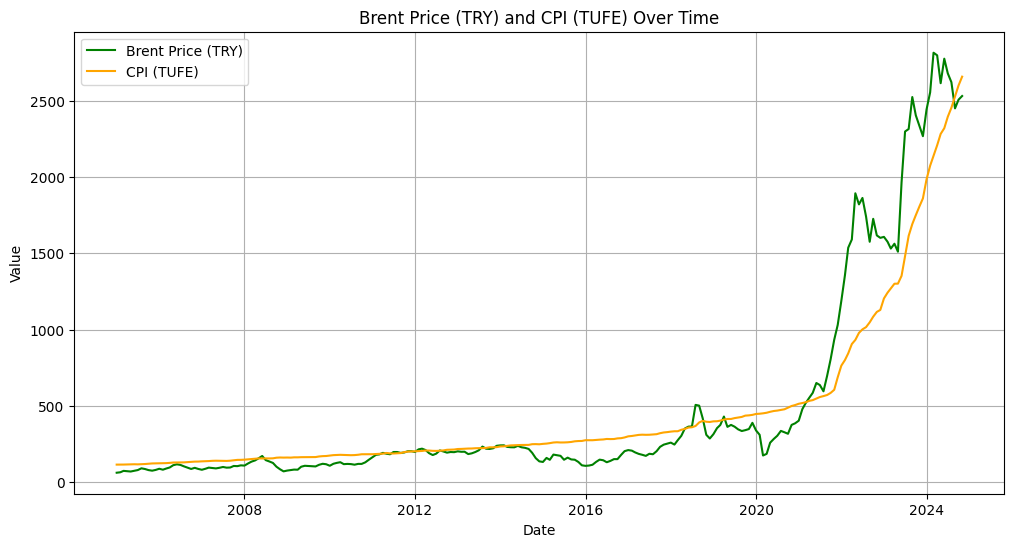


ADF Test for BRENT_PRICE_TRY
ADF Statistic: 2.48996201586367
p-value: 0.9990465420600435
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}

ADF Test for TUFE
ADF Statistic: 2.5009680616204784
p-value: 0.9990501620260422
Critical Values: {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}
ADF Test for Brent Price (TRY):
ADF Statistic: 2.48996201586367
p-value: 0.9990465420600435
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}

ADF Test for TUFE:
ADF Statistic: 2.5009680616204784
p-value: 0.9990501620260422
Critical Values: {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}

ADF Test for Differenced Brent Price (TRY):
ADF Statistic: -2.5842987169862646
p-value: 0.09628601980407941
Critical Values: {'1%': -3.460154163751041, '5%': -2.874648939216792, '10%': -2.5737567259151044}

ADF Test for Differenced TUFE:
ADF Statistic: -0.09

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

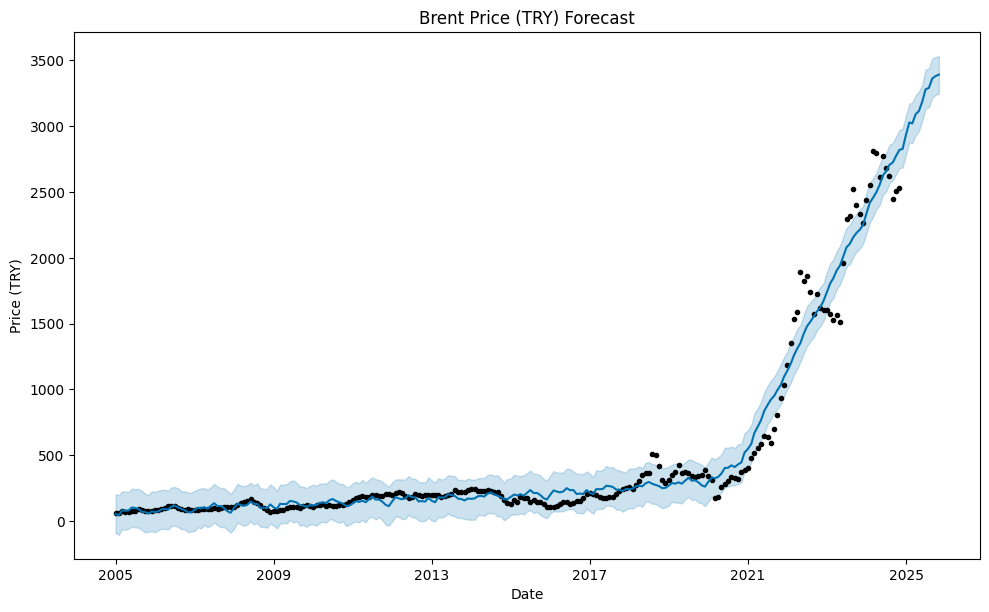

<Figure size 1000x600 with 0 Axes>

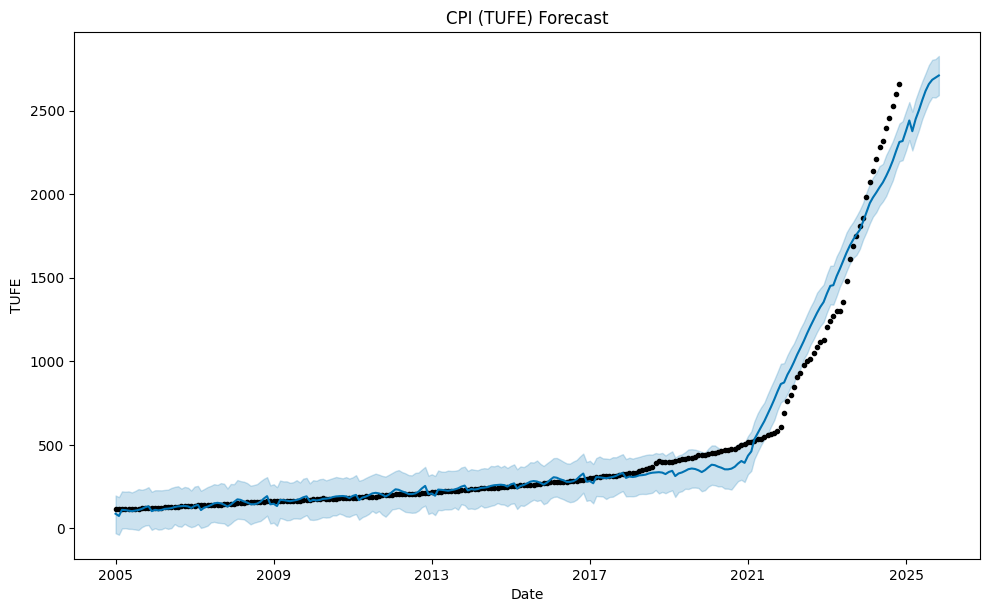

In [30]:
import pandas as pd

# Load the Excel file
file_path = '/content/BRENT_TUFE_DATA.xlsx'  # Update with your file path if needed
df = pd.read_excel(file_path)

# Display column names and first few rows
print("Column Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Brent price in TRY dynamically
df['BRENT_PRICE_TRY'] = df['BRENT PRICE (USD)'] * (df['USDTRY'] / 10000)

# Check the transformed data
print("\nTransformed Data (First 5 Rows):\n", df[['Date', 'BRENT PRICE (USD)', 'USDTRY', 'BRENT_PRICE_TRY']].head())

# Correlation between Brent Price (TRY) and TUFE
correlation_try = df['BRENT_PRICE_TRY'].corr(df['TUFE'])
print(f"\nCorrelation between TRY-based Brent Price and TUFE: {correlation_try}")

# Plot Brent Price (TRY) and TUFE over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['BRENT_PRICE_TRY'], label='Brent Price (TRY)', color='green')
plt.plot(df['Date'], df['TUFE'], label='CPI (TUFE)', color='orange')
plt.title('Brent Price (TRY) and CPI (TUFE) Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

from statsmodels.tsa.stattools import adfuller

# ADF Test for BRENT_PRICE_TRY
adf_brent_try = adfuller(df['BRENT_PRICE_TRY'])
print("\nADF Test for BRENT_PRICE_TRY")
print(f"ADF Statistic: {adf_brent_try[0]}")
print(f"p-value: {adf_brent_try[1]}")
print(f"Critical Values: {adf_brent_try[4]}")

# ADF Test for TUFE
adf_tufe = adfuller(df['TUFE'])
print("\nADF Test for TUFE")
print(f"ADF Statistic: {adf_tufe[0]}")
print(f"p-value: {adf_tufe[1]}")
print(f"Critical Values: {adf_tufe[4]}")

from statsmodels.tsa.stattools import adfuller

# Dynamically calculate Brent Price in TRY
brent_try_dynamic = data['BRENT PRICE (USD)'] * (data['USDTRY'] / 10000)

# ADF Test for Brent Price in TRY (Dynamic Calculation)
adf_brent_try = adfuller(brent_try_dynamic)
print("ADF Test for Brent Price (TRY):")
print(f"ADF Statistic: {adf_brent_try[0]}")
print(f"p-value: {adf_brent_try[1]}")
print(f"Critical Values: {adf_brent_try[4]}")

# ADF Test for TUFE
adf_tufe = adfuller(data['TUFE'])
print("\nADF Test for TUFE:")
print(f"ADF Statistic: {adf_tufe[0]}")
print(f"p-value: {adf_tufe[1]}")
print(f"Critical Values: {adf_tufe[4]}")

# Differencing Brent Price in TRY dynamically
brent_try_diff_dynamic = brent_try_dynamic.diff().dropna()

# ADF Test for Differenced Brent Price in TRY
adf_brent_try_diff = adfuller(brent_try_diff_dynamic)
print("\nADF Test for Differenced Brent Price (TRY):")
print(f"ADF Statistic: {adf_brent_try_diff[0]}")
print(f"p-value: {adf_brent_try_diff[1]}")
print(f"Critical Values: {adf_brent_try_diff[4]}")

# Differencing TUFE dynamically
tufe_diff_dynamic = data['TUFE'].diff().dropna()

# ADF Test for Differenced TUFE
adf_tufe_diff = adfuller(tufe_diff_dynamic)
print("\nADF Test for Differenced TUFE:")
print(f"ADF Statistic: {adf_tufe_diff[0]}")
print(f"p-value: {adf_tufe_diff[1]}")
print(f"Critical Values: {adf_tufe_diff[4]}")

# Differencing the series twice for Brent Price (TRY)
brent_try_diff2 = brent_try_dynamic.diff().diff().dropna()
adf_brent_try_diff2 = adfuller(brent_try_diff2)
print("\nADF Test for Second Differenced Brent Price (TRY):")
print(f"ADF Statistic: {adf_brent_try_diff2[0]}")
print(f"p-value: {adf_brent_try_diff2[1]}")
print(f"Critical Values: {adf_brent_try_diff2[4]}")

# Differencing the series twice for TUFE
tufe_diff2 = data['TUFE'].diff().diff().dropna()
adf_tufe_diff2 = adfuller(tufe_diff2)
print("\nADF Test for Second Differenced TUFE:")
print(f"ADF Statistic: {adf_tufe_diff2[0]}")
print(f"p-value: {adf_tufe_diff2[1]}")
print(f"Critical Values: {adf_tufe_diff2[4]}")

from statsmodels.tsa.stattools import grangercausalitytests

# Preparing data for Granger causality test
data_granger = pd.DataFrame({
    'Brent_Price_TRY_Diff2': brent_try_dynamic.diff().diff().dropna(),
    'TUFE_Diff2': data['TUFE'].diff().diff().dropna()
}).dropna()

# Granger causality test with lags from 1 to 4
print("Granger Causality Test Results")
grangercausalitytests(data_granger, maxlag=4, verbose=True)

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import logging

# Suppress cmdstanpy logs
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

# Load the data
file_path = 'BRENT_TUFE_DATA.xlsx'
data = pd.read_excel(file_path)

# Prepare the data
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data['Brent_Price_Try'] = data['BRENT PRICE (USD)'] * (data['USDTRY'] / 10000)

# Prepare data for Prophet
df_brent = data[['Date', 'Brent_Price_Try']].rename(columns={'Date': 'ds', 'Brent_Price_Try': 'y'})
df_tufe = data[['Date', 'TUFE']].rename(columns={'Date': 'ds', 'TUFE': 'y'})

# Prophet model for Brent Price
model_brent = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_brent.fit(df_brent)
future_brent = model_brent.make_future_dataframe(periods=12, freq='ME')
forecast_brent = model_brent.predict(future_brent)

# Visualize Brent Price predictions
plt.figure(figsize=(10, 6))
model_brent.plot(forecast_brent)
plt.title('Brent Price (TRY) Forecast')
plt.xlabel('Date')
plt.ylabel('Price (TRY)')
plt.grid()
plt.show()

# Prophet model for TUFE
model_tufe = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_tufe.fit(df_tufe)
future_tufe = model_tufe.make_future_dataframe(periods=12, freq='ME')
forecast_tufe = model_tufe.predict(future_tufe)

# Visualize TUFE predictions
plt.figure(figsize=(10, 6))
model_tufe.plot(forecast_tufe)
plt.title('CPI (TUFE) Forecast')
plt.xlabel('Date')
plt.ylabel('TUFE')
plt.grid()
plt.show()
